In [14]:
from functions import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [15]:
data = load_data()
activities =  make_activities_df(data)
summary_broad = make_summary(data, activities, categories_broad, shortcuts_broad)
summary_detail = make_summary(data, activities, categories_detail, shortcuts_detail)
ocenki = grading(data, activities, summary_detail, grades)

C:\Users\Alicja\Documents\life_data\functions.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  5.0, 5.0, 4.0]


In [16]:
n_days = 7 #as today not included, need to make this more intuitive

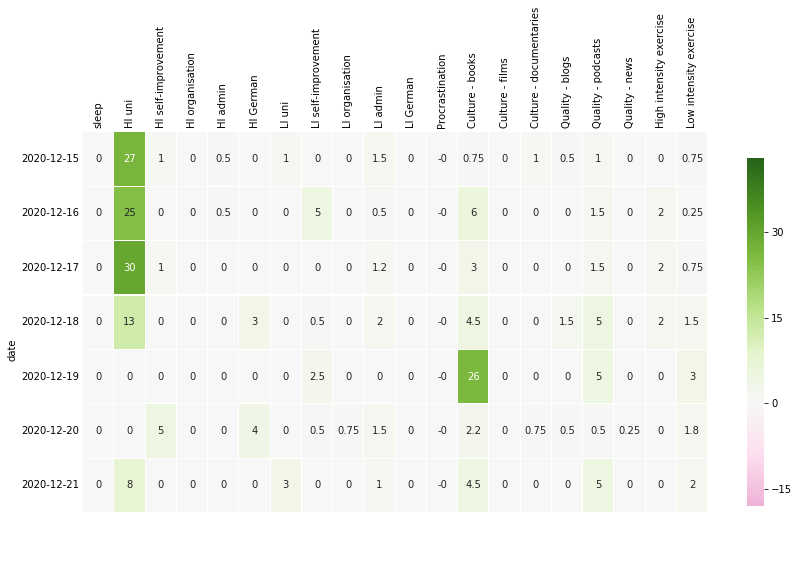

In [17]:
plot_grades(ocenki)

In [18]:
print('scores for each of the days:')
print(ocenki.iloc[-n_days-1:-1].sum(axis = 1))

scores for each of the days:
date
2020-12-15    35.00
2020-12-16    40.75
2020-12-17    39.50
2020-12-18    33.00
2020-12-19    36.75
2020-12-20    17.75
2020-12-21    23.50
dtype: float64


In [19]:
week_total = ocenki.sum(axis = 1).values[-n_days-1:-1].sum()
total_diff = ocenki.sum(axis = 1).values[-n_days-1:-1].sum() - ocenki.sum(axis = 1).values[-n_days*2-1:-n_days-1].sum()
week_mean = round(ocenki.sum(axis = 1).values[-n_days-1:-1].mean(),2)
week_diff = round(ocenki.sum(axis = 1).values[-n_days-1:-1].mean() - ocenki.sum(axis = 1).values[-n_days*2-1:-n_days-1].mean(), 2)
mood_mean = round(data['av_mood'].values[-n_days-1:-1].mean(), 2)
mood_diff = round(data['av_mood'].values[-n_days-1:-1].mean() - data['av_mood'].values[-n_days*2-1:-n_days-1].mean(), 2)


#total_diff_str

In [20]:
print('total score for the past ' + str(n_days) + ' days: ' + str(week_total), end = '')
if (total_diff > 0):
    print(' (+' + str(total_diff) + ')', end = '')
else:  print(' (' + str(total_diff) + ')', end = '')

print(', daily mean: ' + str(week_mean), end = '')

if (week_diff > 0):
    print(' (+' + str(week_diff) + ')')
else: print(' (' + str(week_diff) + ')')

print('mean mood for the past ' + str(n_days) + ' days: ' + str(mood_mean), end = '')
if (mood_diff > 0):
    print(' (+' + str(mood_diff) + ')')
else:  print(' (' + str(mood_diff) + ')')

total score for the past 7 days: 226.25 (+4.5), daily mean: 32.32 (+0.64)
mean mood for the past 7 days: 5.67 (+0.71)


In [23]:
this_week_sum = summary_detail.iloc[-n_days-1:-1].sum()
prev_week_comp = summary_detail.iloc[-n_days-1:-1].sum() - summary_detail.iloc[-n_days*2-1:-n_days-1].sum()

pd.concat([this_week_sum, prev_week_comp], axis=1)

,0,1
sleep,48.00,4.25
HI uni,25.75,-7.00
HI self-improvement,1.75,-0.50
HI organisation,0.00,0.00
HI admin,1.00,1.00
HI German,1.75,-0.25
LI uni,2.00,-1.25
LI self-improvement,4.25,-8.00
LI organisation,0.75,0.75
LI admin,7.75,4.25


In [24]:
for i, cat in enumerate(categories_detail):
    if (this_week_sum[i] != 0 or prev_week_comp[i] != 0):
        if (prev_week_comp[i] > 0):
            print(cat, ': ', this_week_sum[i], ' (+' + str(prev_week_comp[i]) + ')')
        else:
            print(cat, ': ', this_week_sum[i], ' (' + str(prev_week_comp[i]) + ')')

sleep :  48.0  (+4.25)
HI uni :  25.75  (-7.0)
HI self-improvement :  1.75  (-0.5)
HI admin :  1.0  (+1.0)
HI German :  1.75  (-0.25)
LI uni :  2.0  (-1.25)
LI self-improvement :  4.25  (-8.0)
LI organisation :  0.75  (+0.75)
LI admin :  7.75  (+4.25)
Human function :  10.5  (+5.25)
Culture - books :  15.75  (+13.0)
Culture - films :  0.0  (-4.5)
Culture - documentaries :  1.75  (+1.75)
Culture - TV :  0.0  (-1.5)
Socialising :  27.25  (-13.25)
Quality - blogs :  1.25  (+0.25)
Quality - podcasts :  9.75  (+6.75)
Quality - news :  0.25  (+0.25)
Quality - YT :  0.25  (+0.25)
Quality - chill :  1.0  (0.0)
Travelling :  10.5  (+10.5)
Idle :  1.5  (+1.0)
High intensity exercise :  1.5  (+0.75)
Low intensity exercise :  10.0  (-1.0)


In [25]:
summary_detail.iloc[[-1]].T

date,2020-12-22
sleep,5.50
HI uni,3.00
HI self-improvement,1.25
HI organisation,0.00
HI admin,0.00
HI German,0.00
LI uni,0.25
LI self-improvement,0.00
LI organisation,0.00
LI admin,1.00


In [26]:
print(ocenki.iloc[-1].sum())

ocenki.iloc[-1].T

19.25


sleep                       0.00
HI uni                     12.00
HI self-improvement         5.00
HI organisation             0.00
HI admin                    0.00
HI German                   0.00
LI uni                      0.50
LI self-improvement         0.00
LI organisation             0.00
LI admin                    1.00
LI German                   0.00
Human function              0.00
Procrastination            -0.00
Culture - books             0.00
Culture - films             0.00
Culture - documentaries     0.00
Culture - TV                0.00
Socialising                 0.00
Quality - blogs             0.00
Quality - podcasts          0.00
Quality - news              0.00
Quality - wikipedia         0.00
Quality - games             0.00
Quality - YT                0.00
Quality - chill             0.00
Travelling                  0.00
Idle                        0.00
High intensity exercise     0.00
Low intensity exercise      0.75
Name: 2020-12-22, dtype: float64